In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import pylab as plt
%matplotlib inline

In [34]:
v = pd.read_csv('../data/ventastotal_cod2.csv')
v = v.drop(columns='Unnamed: 0')

import pandas as pd

# Convert the 'fecha_cliente' column to pandas Timestamp objects
v['fecha_cliente'] = pd.to_datetime(v['fecha_cliente'])

# Convert the Timestamp objects to UNIX timestamps (integer representation)
v['fecha_cliente'] = v['fecha_cliente'].astype(int) // 10**9

# Select desired columns
v = v[['cliente', 'importe_de_venta', 'tipo', 'fecha', 'fecha_cliente']]

print(v)

vdummy = pd.get_dummies(v.tipo)

merged_df = pd.concat([vdummy, v], axis=1)






cliente = merged_df.groupby('cliente').agg({'importe_de_venta': 'sum','fecha': 'count','fecha_cliente':'max',
                                    'Abonos por errores':'sum',
                                   'Consultoria':'sum',
                                   'Copia de seguridad':'sum',
                                   'Desarrollo APPS':'sum',
                                   'Desarrollo SW':'sum',
                                   'Gastos bancarios devol':'sum',
                                   'Gastos corrientes':'sum',
                                   'HW/SW Seguridad':'sum',
                                   'HW/SW Seguridad':'sum',
                                   'Horas sueltas':'sum',
                                   'Kit Digital':'sum',
                                   'Licencia MS':'sum',
                                   'Licencia SW':'sum',
                                   'Mantenimiento APPS':'sum',
                                   'Mantenimiento SW':'sum',
                                   'RMM':'sum',
                                    'SMI':'sum',
                                    'Venta accesorios':'sum',
                                    'Venta de equipos':'sum',
                                    'Venta servidores':'sum',
                                    'nesicCLOUD':'sum',
                                    
                                   })

       cliente  importe_de_venta              tipo       fecha  fecha_cliente
0       id_959             90.00  Mantenimiento SW  2016-06-01     1460120460
1       id_480            126.43  Venta accesorios  2016-06-03     1460120400
2       id_643            347.56  Venta accesorios  2016-06-03     1460120460
3       id_807             79.00       Licencia SW  2016-06-03     1460120460
4       id_663             29.25               RMM  2016-06-03     1460120460
...        ...               ...               ...         ...            ...
19944  id_1110             55.14  Venta accesorios  2023-08-24     1610359380
19945  id_1110           1501.50  Venta de equipos  2023-08-24     1610359380
19946   id_356            563.75  Venta de equipos  2023-08-24     1460120400
19947   id_356            358.30  Venta accesorios  2023-08-24     1460120400
19948  id_1093           5505.00     Desarrollo SW  2023-08-24     1582891620

[19949 rows x 5 columns]


In [35]:
cliente

,importe_de_venta,fecha,fecha_cliente,Abonos por errores,Consultoria,Copia de seguridad,Desarrollo APPS,Desarrollo SW,Gastos bancarios devol,Gastos corrientes,HW/SW Seguridad,Horas sueltas,Kit Digital,Licencia MS,Licencia SW,Mantenimiento APPS,Mantenimiento SW,RMM,SMI,Venta accesorios,Venta de equipos,Venta servidores,nesicCLOUD
cliente,,,,,,,,,,,,,,,,,,,,,,,
id_1,84.32,10,1460120400,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,9,0,0,0
id_1000,22.50,1,1480934340,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
id_1003,116.91,3,1484065080,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0
id_1005,880.93,4,1485184740,0,1,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0
id_1006,873.04,27,1485251220,0,0,20,0,0,0,0,0,4,0,0,0,0,0,2,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
id_994,23153.69,335,1474993020,0,1,62,0,0,0,0,3,30,0,27,0,0,0,123,37,42,9,1,0
id_996,147.00,2,1475089380,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
id_997,644.55,6,1475748780,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0


In [36]:
from sklearn.cluster import DBSCAN

In [37]:
import umap

import seaborn as sns

In [38]:
reduc=umap.UMAP(n_components=2).fit_transform(cliente)

reduc.shape

(332, 2)

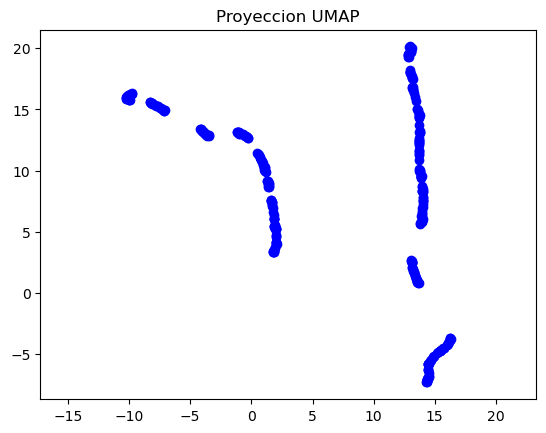

In [41]:
plt.scatter(reduc[:,0], # x
            reduc[:, 1],# y 
            c='blue')
#[sns.color_palette()[x] for x in load_iris().target]


plt.gca().set_aspect('equal', 'datalim')
plt.title('Proyeccion UMAP');

# GM

In [60]:
from sklearn.mixture import GaussianMixture as GM
gm=GM(n_components=4, 
      covariance_type='full')

gm.fit(cliente)

cliente['category']=gm.predict(cliente)

In [61]:
cliente['category'].unique() 

array([3, 1, 2, 0])

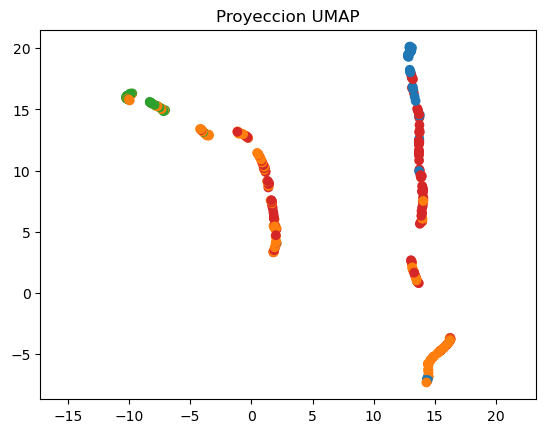

In [62]:
plt.scatter(reduc[:,0], # x
            reduc[:, 1],# y 
            c=[sns.color_palette()[x] for x in cliente.category])
#[sns.color_palette()[x] for x in cliente.category]


plt.gca().set_aspect('equal', 'datalim')
plt.title('Proyeccion UMAP');

In [69]:
cliente[cliente.category == 1].head(50)

,importe_de_venta,fecha,fecha_cliente,Abonos por errores,Consultoria,Copia de seguridad,Desarrollo APPS,Desarrollo SW,Gastos bancarios devol,Gastos corrientes,HW/SW Seguridad,Horas sueltas,Kit Digital,Licencia MS,Licencia SW,Mantenimiento APPS,Mantenimiento SW,RMM,SMI,Venta accesorios,Venta de equipos,Venta servidores,nesicCLOUD,category
cliente,,,,,,,,,,,,,,,,,,,,,,,,
id_1000,22.50,1,1480934340,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
id_1003,116.91,3,1484065080,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1
id_1010,95.00,1,1485859560,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
id_1015,23.75,1,1486647600,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
id_1017,25.90,3,1487596980,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,1
id_1024,34.00,1,1491329280,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
id_1040,15.00,1,1507920900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
id_1042,39.23,1,1510572300,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
id_1045,612.00,2,1513172280,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1


# Optics

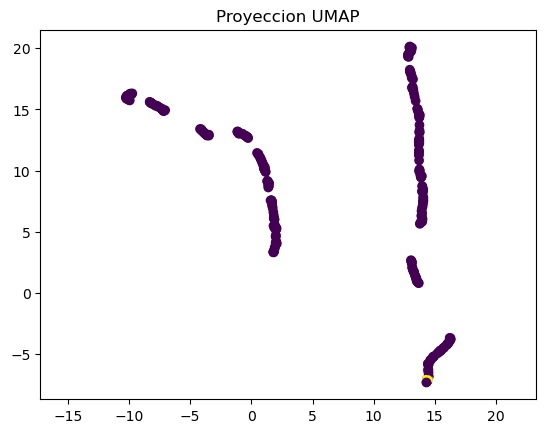

In [51]:
from sklearn.cluster import OPTICS
opt=OPTICS(max_eps=1, eps=0.5, min_samples=5)

opt.fit(cliente)

cliente2=cliente
cliente2['category']=opt.labels_

plt.scatter(reduc[:,0], # x
            reduc[:, 1],# y 
            c=opt.labels_)
#[sns.color_palette()[x] for x in cliente.category]


plt.gca().set_aspect('equal', 'datalim')
plt.title('Proyeccion UMAP');